### Cho dữ liệu iris.xls
1. Chuẩn hóa dữ liệu X chứa 4 thuộc tính
2. Tìm số cụm phù hợp k?
3. Áp dụng thuật toán GMM để giải bài toán phân cụm với số cụm k
4. Cho X_test = np.array([[4.7, 3.2, 1.5, 0.4], [4.8, 3.5, 4.5,1.6], [6.1, 3.5, 5.7,2]]), cho biết phần tử này thuộc cụm nào?
5. Vẽ hình, xem kết quả

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn import metrics

In [2]:
data = pd.read_excel('../../Data/iris.xls')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


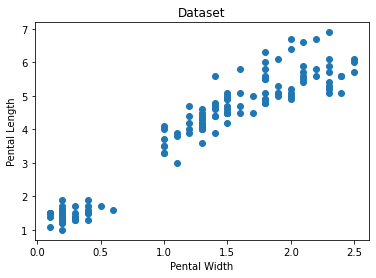

In [5]:
plt.scatter(data.petalwidth, data.petallength)
plt.title('Dataset')
plt.ylabel("Pental Length")
plt.xlabel("Pental Width")
plt.show()

In [6]:
X_train = data.drop('iris', axis = 1)

In [7]:
list_sil = [] # chua danh sach cac gia tri sil
K = range(2,8) # chua danh sach cac k
for k in K:
    gmm = GaussianMixture(n_components=k) # 2, 3, 4...
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    # k = 2 => 0, 1
    # k = 3 => 0, 1, 2
    sil = metrics.silhouette_score(X_train, labels, metric='euclidean')
    list_sil.append(sil)

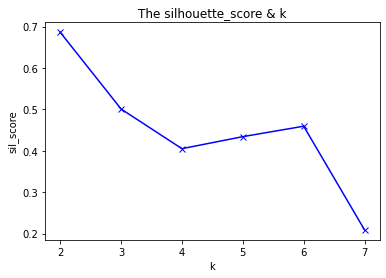

In [8]:
# Plot
plt.plot(K, list_sil, 'bx-')
plt.xlabel('k')
plt.ylabel('sil_score')
plt.title('The silhouette_score & k')
plt.show()

### Select k = 2

In [9]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)

GaussianMixture(n_components=2)

### Sau khi model đã hội tụ, weights, means, và covariances cần phải được giải quyết. In các thông số này:

In [10]:
print(gmm.weights_)

[0.33332834 0.66667166]


In [11]:
print(gmm.means_)

[[5.00600757 3.41801668 1.46400244 0.24399917]
 [6.2619868  2.87199575 4.90597298 1.67598968]]


In [12]:
print(gmm.covariances_)

[[[0.12176299 0.09828504 0.015815   0.01033657]
  [0.09828504 0.14226051 0.01144544 0.0112091 ]
  [0.015815   0.01144544 0.02950504 0.00558422]
  [0.01033657 0.0112091  0.00558422 0.01126512]]

 [[0.43497698 0.12094258 0.44887221 0.16550493]
  [0.12094258 0.10961862 0.14138226 0.07923325]
  [0.44887221 0.14138226 0.67485733 0.28587905]
  [0.16550493 0.07923325 0.28587905 0.17863786]]]


In [13]:
types = gmm.predict(X_train)

In [14]:
X_now = np.array([[4.7, 3.2, 1.5, 0.4], [4.8, 3.5, 4.0,1.6], [6.1, 3.5, 5.7,2]])
y_now = gmm.predict(X_now)
y_now

array([0, 1, 1], dtype=int64)

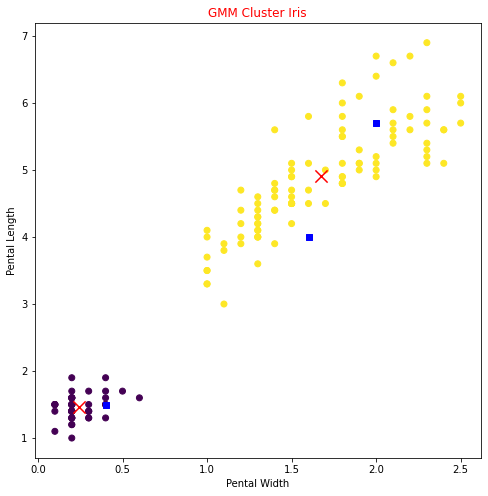

In [15]:
# plot mixture of Gaussians
plt.figure(figsize=(8,8))
plt.scatter(X_train['petalwidth'], X_train['petallength'], c=types)
plt.scatter(X_now[:,3], X_now[:,2], marker="s", c='b')
plt.scatter(gmm.means_[:,3], gmm.means_[:,2], color="red", marker='x', s=150)
plt.xlabel("Pental Width")
plt.ylabel("Pental Length")
plt.title("GMM Cluster Iris", color="red")
plt.show()